# Imports

In [1]:
# Imports
from cvm.cvmgen import InverseTransform
from cvm.cvmgen import Weibull
from cvm.cvmgen import Pareto
from cvm.cvmgen import Erlang
from cvm.cvmgen import CompositionMethod
from cvm.cvmgen import Exponential
from cvm.cvmgen import Generator
from cvm.cvmgen import RejectionMethod
import math
from utilities.distPlot import plot
import numpy as np
from random import random 

## Ex 1

### a
We will make a inverse transform generator. For that, first we have to find the cumulative distribution function.  
We say a random variable is continuous if and only if exists a funcion f such that for every subset C 
$$ P(X \in C) = \int_{C} f(x)dx $$
If the variable is continuous, its cumulative distribution function is:
$$ F(a) = P(X \leq a) = \int_{- \infty}^{a} f(x)dx $$


$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{x-2}{2} & if & 2 \leq x \leq 3 \\
             \\ \cfrac{2-x/3}{2} & if & 3 \leq x \leq 6 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$



If $ 2 \leq x \leq 3 $:

$$
F(X \leq x) = \int_{2}^{x} \cfrac{y-2}{2}dy = \cfrac{x^{2}}{4} -x + 1
$$



If $ 3 \leq x \leq 6 $:

$$
F(X \leq x) = \int_{2}^{3} \cfrac{y-2}{2}dy + \int_{3}^{x} \cfrac{2-y/3}{2}dy =-\cfrac{x^{2}}{12} + x - 2
$$



Summing up




$
F(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             \cfrac{x^{2}}{4} -x + 1 & if & 2 \leq x \leq 3 
             \\ -\cfrac{x^{2}}{12} + x - 2 & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$

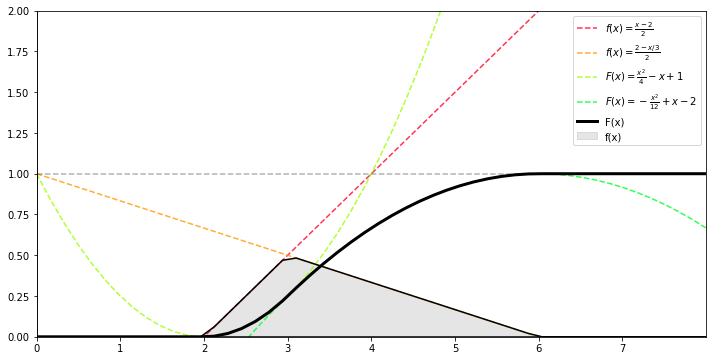

In [2]:
labels = [
    r'$f(x)= \frac{x-2}{2}$',
    r'$f(x)= \frac{2-x/3}{2}$',
    r'$F(x)= \frac{x^{2}}{4} -x + 1$',
    r'$F(x)= - \frac{x^{2}}{12} + x - 2$'
          ]
# This is just to give something to conds. Really dirty 
x = np.linspace(0,8)

# The probability density functions
pdf = [0,
         lambda x: (x-2)/2,
         lambda x: (2-x/3)/2,
         0]

# Conditions for each of the pieces
conds = [x<2,
        (x>2) & (x<3),
        (x>3) & (x<6)]

# Cumulative distribution functions
cdf = [0,
       lambda x: (x**2)/4-x+1,
       lambda x: -(x**2)/12+x-2,
       1]

x_lim = (0,8)
y_lim = (0,2)
fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


Now we can make our inverse transform generator as it follows:
```
def inverseTransform(y):
    u = random()
    if u < F(2):
        return inverseF(u)
    if u < F(3):
        return inverseF(u)
    else:
        return inverseF(u)
```

So for the inverse transform generator we need the inverse of our cummulative function:

$$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             2 \pm 2\sqrt{x} & if & 2 \leq x \leq 3 
             \\ 6 \pm 2\sqrt{3}\sqrt{1-x} & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$$

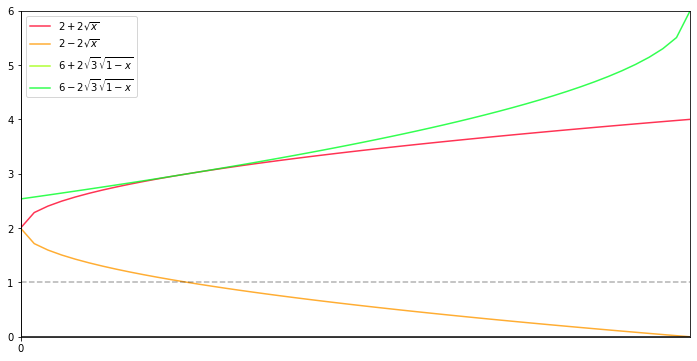

In [3]:
from math import sqrt
labels = [r'$2 + 2\sqrt{x}$',
          r'$2 - 2\sqrt{x}$',
          r'$6 + 2\sqrt{3}\sqrt{1-x}$',
          r'$6 - 2\sqrt{3}\sqrt{1-x}$']

funcs = [lambda x: 2+2*np.sqrt(x),
         lambda x: 2-2*np.sqrt(x),
         lambda x: 6+2*np.sqrt(3)*np.sqrt(1-x),
         lambda x: 6-2*np.sqrt(3)*np.sqrt(1-x) 
        ]
x_lim = (0,1)
y_lim = (0,6)
plot(funcs,x_lim,y_lim,labels,dist=False,ls='-')

We can observe that the only functions that fullfill our requirements: domain in (0,1) and image in (2,3) and (3,6) respectively are $ f(x) = 2 + 2\sqrt{x}$ and $ f(x) = 6-2\sqrt{3}\sqrt{1-x}$
so those are the ones we will use in our generator.

$$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             2 + 2\sqrt{x} & if & 2 \leq x \leq 3 
             \\ 6 - 2\sqrt{3}\sqrt{1-x} & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$$


In [4]:
# Probability distribution functions
pdf = [0,
         lambda x: (x-2)/2,
         lambda x: (2-x/3)/2,
         0]

# Linear space where we the conditions are applied
x = np.linspace(0,8)
conds = [x<2,
        (x>2) & (x<3),
        (x>3) & (x<6)]

cdfInverse = [lambda x: 2+2*np.sqrt(x),
              lambda x: 6-2*np.sqrt(3)*np.sqrt(1-x)]

# Limit values of the piece-wise function
lims = [3,6]

# Cummulative distribution applied to each of the limits
# in lims
cdf = [lambda x: (x**2)/4-x+1,
          lambda x: -(x**2)/12+x-2]


exAgen = InverseTransform(cdfInverse,limits=lims,cdf=cdf,pdf=pdf,conds=conds)

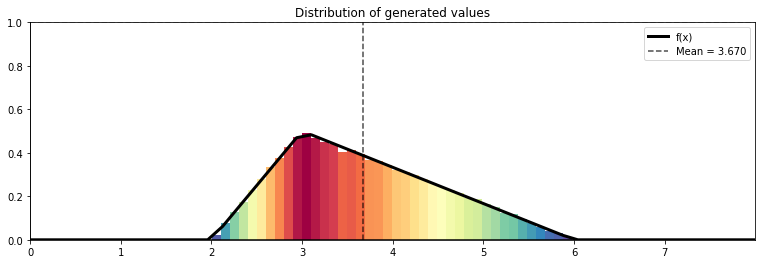

In [5]:
exAgen.plot(100000,figsize=(13,4),bins=40)

In [6]:
exAgen.limits

[0.25, 1.0]

### b

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{6(x+3)}{35} & if & 0 \leq x \leq 1 \\
             \\ \cfrac{6x^{2}}{35} & if & 1 \leq x \leq 2 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


$
F(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 0 \\
             \cfrac{3x^{2}+18}{35} & if & 0 \leq x \leq 1 
             \\ \cfrac{6}{10}+\cfrac{2x^{3}-2}{35} & if & 1 \leq x \leq 2 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$


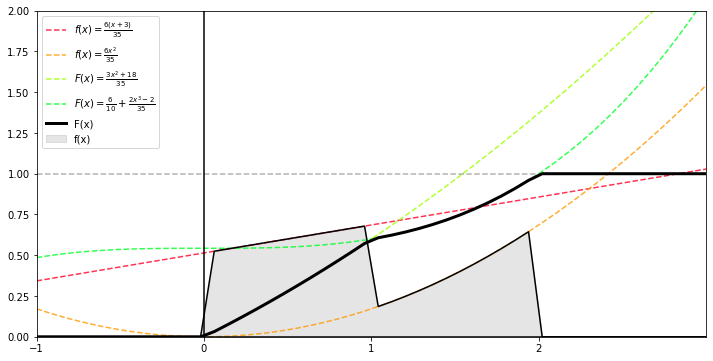

In [7]:
from utilities.distPlot import plot
import numpy as np
labels = [
    r'$f(x)= \frac{6(x+3)}{35}$',
    r'$f(x)= \frac{6x^{2}}{35}$',
    r'$F(x)= \frac{3x^{2}+18}{35}$',
    r'$F(x)= \frac{6}{10}+\frac{2x^{3}-2}{35}$'
          ]

# This is the linear space in which the conditions are applied 
x_lim = (-1,3)
y_lim = (0,2)

x = np.linspace(x_lim[0],x_lim[1])

pdf = [0,
       lambda x: (6*(x+3))/35,
       lambda x: (6*(x**2))/35,
       0]

conds = [x<=0,
        (x>0) & (x<=1),
        (x>1) & (x<2)]

cdf = [0,
       lambda x: (6/35)*((x**2)/2+x*3),
       lambda x: (6/10)+(2/35)*((x**3)-1),
       1]

fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


We can see that the function is consistent with the hypothesis needed to apply the 
inverse transform method so we will use it again.
Now we calculate the inverse function of the cumulative probability function.

<ipython-input-8-3ef0164d31a8>:8: RuntimeWarning: invalid value encountered in sqrt
  cdfInverseCandidates = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
<ipython-input-8-3ef0164d31a8>:9: RuntimeWarning: invalid value encountered in sqrt
  lambda x: -3 - np.sqrt(35*x+27)/np.sqrt(3),


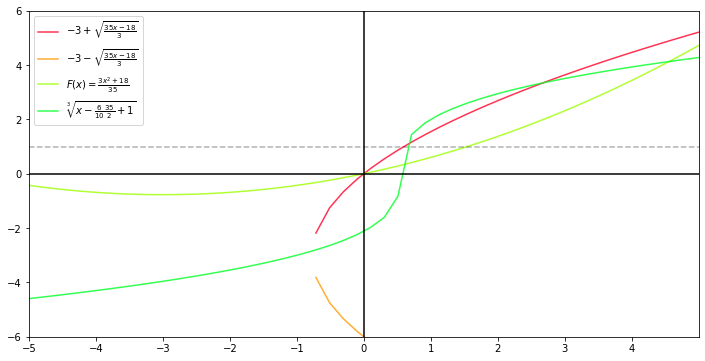

In [8]:
from math import sqrt
labels = [r'$-3 + \sqrt{\frac{35x-18}{3}}$',
          r'$-3 - \sqrt{\frac{35x-18}{3}}$',
          r'$F(x)= \frac{3x^{2}+18}{35}$',
          r'$\sqrt[3]{x-\frac{6}{10}\frac{35}{2}+1}$',
          ]

cdfInverseCandidates = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
                        lambda x: -3 - np.sqrt(35*x+27)/np.sqrt(3),
                        lambda x: (6/35)*((x**2)/2+x*3),
                        lambda x: np.cbrt((35*x-19)/2)]
x_lim = (-5,5)
y_lim = (-6,6)
plot(cdfInverseCandidates,x_lim,y_lim,labels,dist=False,ls='-')

$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 0 \\
             -3 + \sqrt{\frac{35x+27}{3}} & if & 0 \leq x \leq 1 
             \\ \sqrt[3]{x-\frac{6}{10}\frac{35}{2}+1} & if & 1 \leq x \leq 2 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$


In [9]:
lims = [1,2]


cdfInverse = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
              lambda x: np.cbrt((35*x-19)/2)]
cdf = [lambda x: (6/35)*((x**2)/2+x*3),
       lambda x: (6/10)+(2/35)*((x**3)-1)]

exBgen = InverseTransform(cdfInverse,limits=lims,cdf=cdf,pdf=pdf,conds=conds,x_lim=(-1,3))

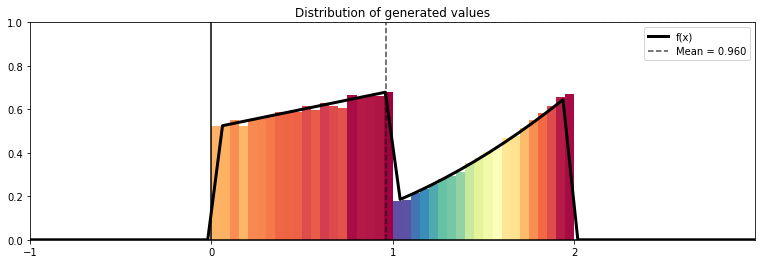

In [10]:
exBgen.plot(100000,figsize=(13,4),bins=40)

### c

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{exp(4x)}{4} & if &  - \infty < x \leq 0 \\
             \\ \cfrac{1}{4} & if & 0 \leq x \leq \cfrac{15}{4} \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


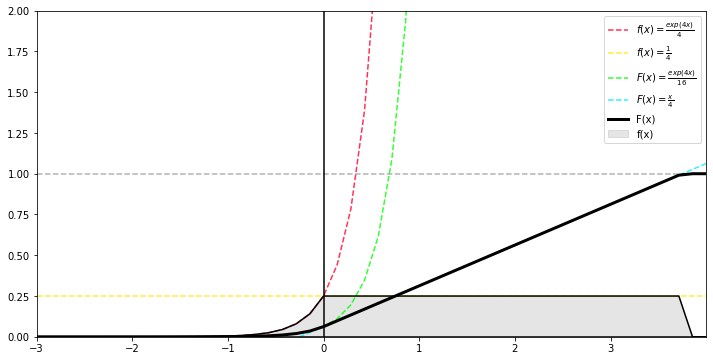

In [11]:
from math import exp
labels = [
    r'$f(x)= \frac{exp(4x)}{4}$',
    r'$f(x)= \frac{1}{4}$',
    r'$F(x)= \frac{exp(4x)}{16}$',
    r'$F(x)= \frac{x}{4}$'
          ]

# This is the linear space in which the conditions are applied 
x_lim = (-3,4)
y_lim = (0,2)

x = np.linspace(x_lim[0],x_lim[1])

pdf = [lambda x: np.exp(4*x)/4,
       lambda x: (0*x)+1/4,
       0]

conds = [x<0,
        (x>=0) & (x<=15/4),
        (x>15/4)]

cdf = [lambda x: np.exp(4*x)/16,
       lambda x: x/4 + 1/16,
       1]

fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


The hyphotesis are fullfilled. So we are going to use the inverse method again

In [12]:
lims = [0,15/4]


cdfInverse = [lambda x: (1/4)*np.log(16*x),
              lambda x: (1/4)*(16*x-1)]

cdf = [lambda x: np.exp(4*x)/16,
       lambda x: x/4 + 1/16]

exCgen = InverseTransform(cdfInverse,lims,cdf=cdf,pdf=pdf,conds=conds,x_lim=(-3,4))

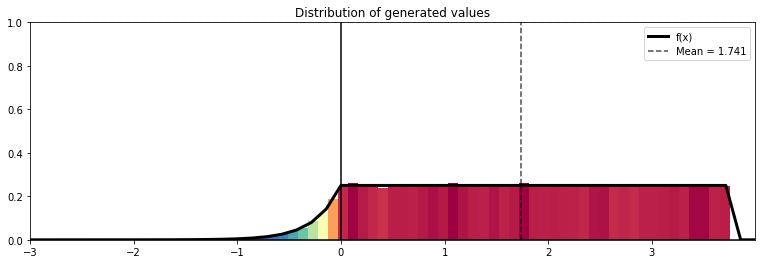

In [13]:
exCgen.plot(100000,figsize=(13,4),bins=60)

## Ex 2

### Pareto Distribution
Design a method to generate random variables Pareto distributed:
$$
f(x)= ax^{-(a+1)}    1 < x < \infty, a > 0
$$

$$
F(x)= 1-s^{-a}
$$

In [14]:
import numpy as np
from cvm.cvmgen import Pareto
from utilities.distPlot import plot

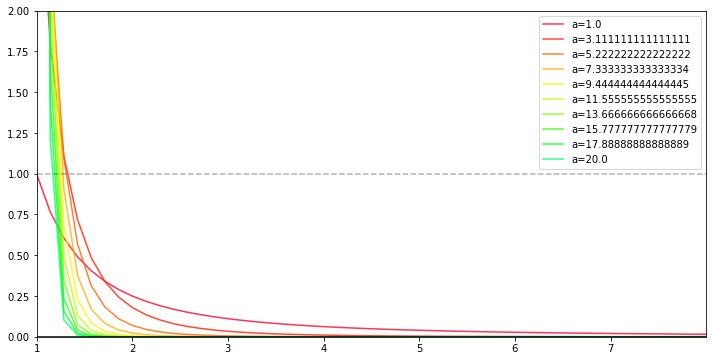

In [15]:
n = 3
x_lim = (1,8)
y_lim = (0,2)
paretos = [Pareto(i).pdf[1] for i in np.linspace(1,20,10)]
labels = [r'a={}'.format(i) for i in np.linspace(1,20,10)]
plot(paretos,x_lim,y_lim,labels,dist=False,ls='-')

In [16]:
pareto = Pareto(2)

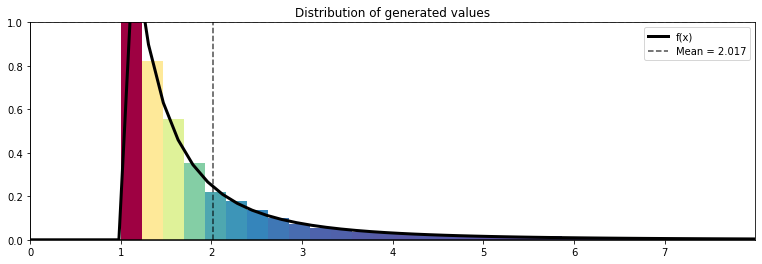

In [17]:
pareto.plot(10000,figsize=(13,4),bins=700)

The mean of a Pareto random variable is
$$
E(X) = \cfrac{\alpha x_{m}}{\alpha-1}
$$

$ \varphi $

In [18]:
pareto.mean

2.01671879374397

### Weibull
$$
f(x) = \cfrac{\beta}{\lambda} \cfrac{x}{\lambda}^{\beta - 1} exp(-(x/\lambda))^{\beta})
$$
$$
0 \leq x , \lambda > 0,  \beta > 0 
$$

$$
F(x) = 1 - e^{-(x/\lambda)^{k}}
$$

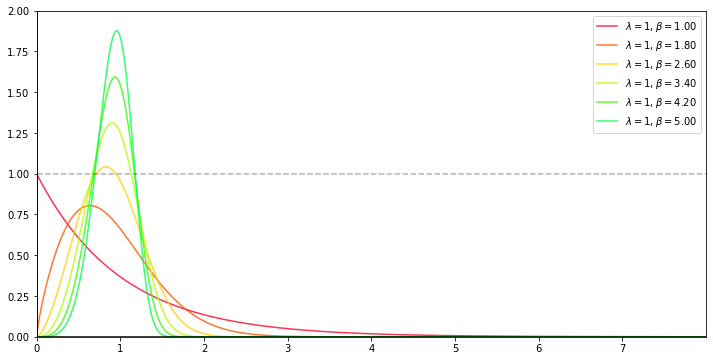

In [19]:
x_lim = (0,8)
y_lim = (0,2)
paretos = [Weibull(1,i,x_lim).pdf[1] for i in np.linspace(1,5,6)]
labels = [r'$\lambda = 1, \beta={:.2f}$'.format(i) for i in np.linspace(1,5,6)]
plot(paretos,x_lim,y_lim,labels,dist=False,ls='-',npoints=300)

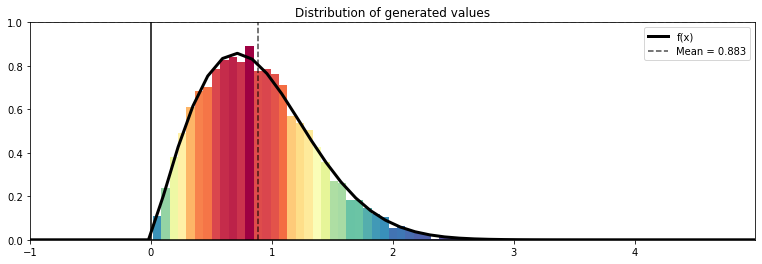

In [21]:
weibull = Weibull(1,2,x_lim=(-1,5))
weibull.plot(10000,figsize=(13,4),bins=50)

The mean of a Weibull variable is
$$
E(X) = \lambda \Gamma (1 + \cfrac{1}{\beta})
$$

where 
$$
\Gamma(x) = \int_{0}^{\infty} t^{z-1} e^{-t}dt
$$  

*If $n \in \mathbb{N}, \Gamma(n) = (n-1)!$*   


*The $\Gamma$ function is an extension of the factorial to complex numbers. Cool huh?*

With $\lambda = 1 , \beta = 2$ our expected mean is:  
$$
E(X) = 1 * \Gamma (3/2) = 0.88
$$

In [22]:
weibull.mean

0.8828745473692748

### Erlang Distribution
$$
f(x) = \cfrac{x^{k-1}exp(-x/\mu)}{(k-1)!\mu^{k}}
$$

$\mu > 0, k \in \mathbb{Z}, x > 0$
Where $k$ is the *shape*, $\mu$ the "scale". Sometimes the reciprocal of the scale, the $\lambda$ "rate" is used. 


First, note that Erlang distribution is from the Gamma family.

$$
\Gamma(x,\alpha,\beta)= \cfrac{1}{\Gamma(\alpha)}\beta^{-\alpha}x^{\alpha-1}e^{-\frac{x}{\beta}}
$$

It's basically a $\Gamma(k,\mu)$  
The mean of an Erlang distribution $E(X) = k \mu = \cfrac{k}{\lambda} $

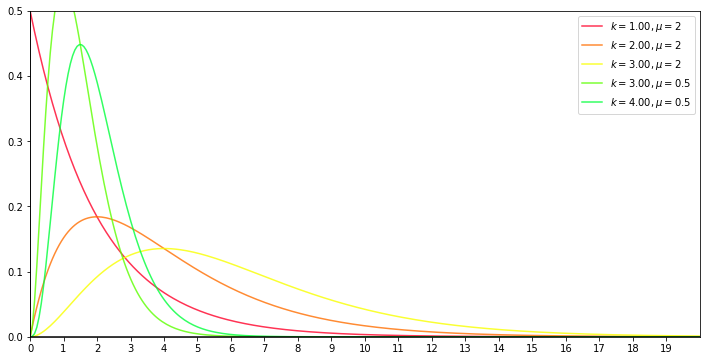

In [23]:
x_lim = (0,20)
y_lim = (0,0.5)
erlangs = [Erlang(i,2,x_lim).pdf[1] for i in range(1,4)] + [Erlang(i,1/2,x_lim).pdf[1] for i in range(3,5)]
labels = [r'$k = {:.2f}, \mu=2$'.format(i) for i in range(1,4)] + [r'$k = {:.2f}, \mu=0.5$'.format(i) for i in range(3,5)]
plot(erlangs,x_lim,y_lim,labels,dist=False,ls='-',npoints=300)

In [24]:
erlang = Erlang(k=2,mu=2,x_lim=(0,20),y_lim=(0,0.5))

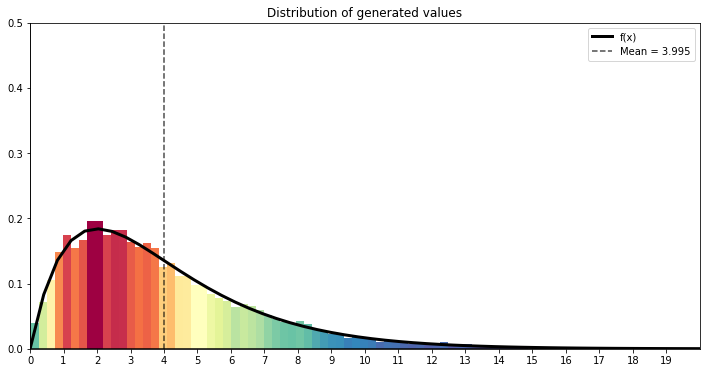

In [25]:
erlang.plot(10000,bins = 100)

## Ex 3


Asuming its relatively easy to generate n random variables with probability distribution $F_{i}, i = 1,...,n$. Develop a method to generate a random variable distributed:
$$
F(x) = \sum_{i=1}^n p_{i}F_{i}(x)
$$
where $p_{i},i=1,...,n$ are non negative numbers that sum 1

The algorithm is:
```
assuming the weights are sorted
u = random()
if u < p1:
    generate F1()
elif u < p2:
    generate F2()
    .
    .
    .
if u < pn:
    generate FN()
```

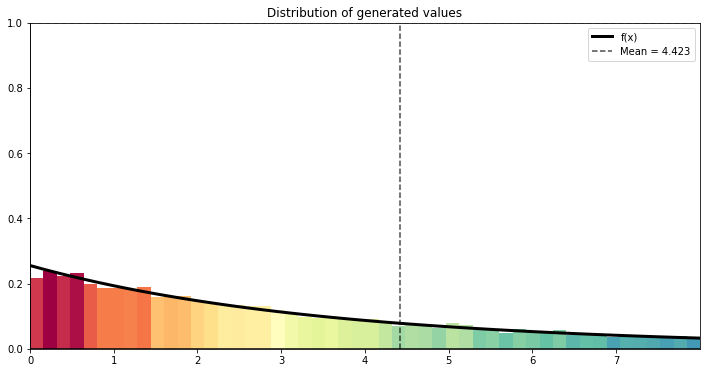

In [26]:
weights = [0.2,0.3,0.5]
generators = [Exponential(1/7),Exponential(1/5),Exponential(1/3)]
composition = CompositionMethod(generators,weights)
composition.plot(10000,bins=300)

In [27]:
0.2*7+0.3*5+0.5*3

4.4

## Ex 4

Develop a method to generate a random variable distributed:
$$
F(x) = \int_{0}^{\infty} x^{y} e^{-y}dy,   0\leq x \leq 1
$$
Suppose that the conditional distribution of X given Y is:  
$$
P(X \leq x | Y = y ) = x^{y}, 0\leq x \leq 1
$$

First note that $e^{-y} = \mathcal{E} (1)$ so $$\int_{0}^{\infty} e^{-y}dy = 1$$
and because the assuption:
$$
P(X\leq x) = \int_{-\infty}^\infty P(X\le x | Y=y) f_Y(y) dy
$$

Algorithm:

```
y = exp(1)
generate a random variable distributed x^y

```

We will generate the random variable using inverse transform method. 
$$F(x)= x^y$$
$$F^{-1}(x) = x^{1/y}$$ 


In [28]:
def ex4generator():
    y = Exponential(1).gen()
    return (random()**(1/y))

In [29]:
pdf = [0,lambda x: 1/(x*(1-np.log(x))**2)]
x = np.linspace(0,1)
conds = [x<0,(x>0) & (x<=1)]
ex4gen = Generator(pdf=pdf,conds=conds,generator=ex4generator,x_lim=(0,1),y_lim=(0,20))

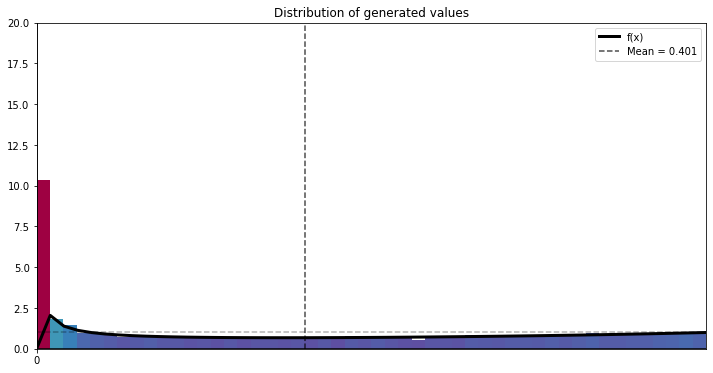

In [31]:
ex4gen.plot(10000,bins=50)

## Ex 5

Consider its easy to generate random variables distributed $F_{i}, i=1,...,n$. Explain how to generate
random variables distributed:
$$
i) F_{M}(x)= \prod_{i=1}^n F_{i}(x)
$$
$$
ii) F_{m}(x) = 1 - \prod_{i=1}^n 1 - F_{i}(x)
$$
  
Generate a sample of M and m considering Xi are independent exponentials with $\lambda = 1,2,3$ respectively

$i)$ First, note that given  
$$
X = Max_{i}(X_{1},...,X_{n})
$$
$$
P(X \leq x) = P(X_{1} \leq x )...P(X_{n} \leq x ) = \prod_{i=1}^n P(X_{i} \leq x)
$$
*(Because if we want the maximum of n variables to be less than x, then all of the variables must be less than x)*

So if $X = Max_{i}(X_{i})$ , $F_{M} = \prod_{i=1}^n F_{i}(x)$ and the algorithm is:
```
def fM()
    generate x1,...,xn random variables with cdf F1,...,Fn
    return max(x1,...,xn)
```

$ii)$
Given 
$$
X = Min_{i}(X_{1},...,X_{n})
$$
$$
P(X \leq x) = 1 - P(X_{1} > x )...P(X_{n} > x) = 1 - \prod_{i=1}^n P(X_{i} > x)
$$
*If we want the MINIMUM of n variables to be less than x, that is equivalent to asking that none of them is larger than x*
```
def fm()
    generate x1,...,xn
    return min(x1,...,xn)
```

In [32]:
def generateM():
    return max(Exponential(1).gen(),Exponential(2).gen(),Exponential(3).gen())

def generatem():
    return min(Exponential(1).gen(),Exponential(2).gen(),Exponential(3).gen())

In [33]:
def maxExp(y):
    y = (max(Exponential(1).pdf[1](y),Exponential(2).pdf[1](y),Exponential(3).pdf[1](y)))
    return y
pdf = [0,lambda y: maxExp(y)]
x = np.linspace(0,5)
conds = [x<0,x>=0]
maxGen = Generator(pdf=[0,0],conds=conds,generator=generateM,x_lim=(0,5))

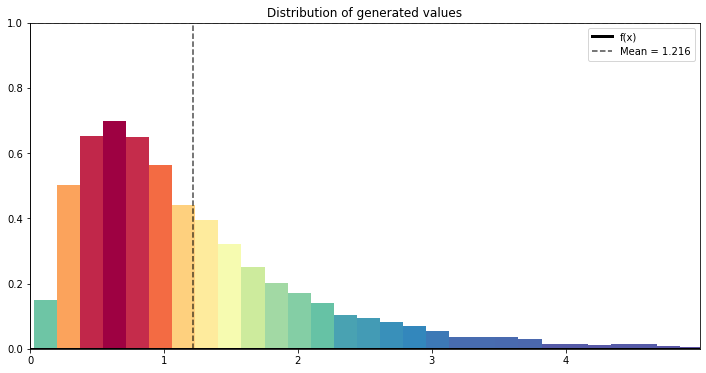

In [34]:
maxGen.plot(10000,bins=60)

In [35]:
pdf = [0,lambda x: 1 - (1-Exponential(1).cdf[1](x)) * (1-Exponential(2).cdf[1](x)) * (1-Exponential(3).cdf[1](x)) ]
#pdf = [0,lambda x: ]
x = np.linspace(0,8)
conds = [x<0,x>=0]
minGen = Generator(pdf=[0,0],conds=conds,generator=generatem,x_lim=(0,8),y_lim=(0,5))

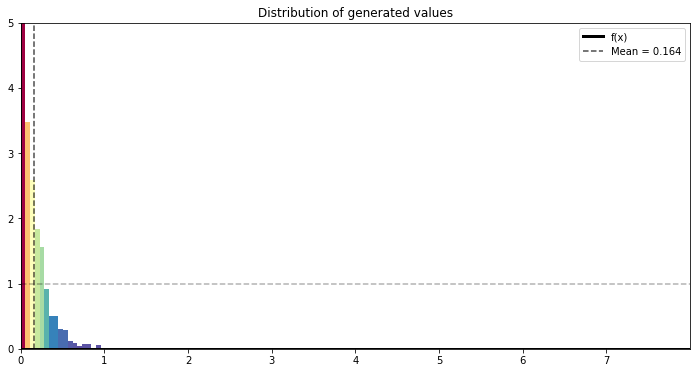

In [36]:
minGen.plot(1000)

## Ex 6

Based on the results of previous exercices, use the Rejection method to generate 2 different methods besides Inverse Transform to generate a random variable with probability distribution:
$$
F(x) = x^{n}, 0 \le x \le 1
$$
Compare the efficency of the 3 methods

### Inverse transform

In [78]:
n = 2
pdf = [0,lambda x: n*(x**(n-1))]
cdf = [lambda x: x**n]
x = np.linspace(0,1)
conds = [x<0,(x>=0) & (x<=1)]
inverse_cdf = [lambda x: x**(1/n)]
ex6itgen = InverseTransform(inverse_cdf,pdf=pdf,cdf=cdf,conds=conds,limits=[1],y_lim=(0,2))

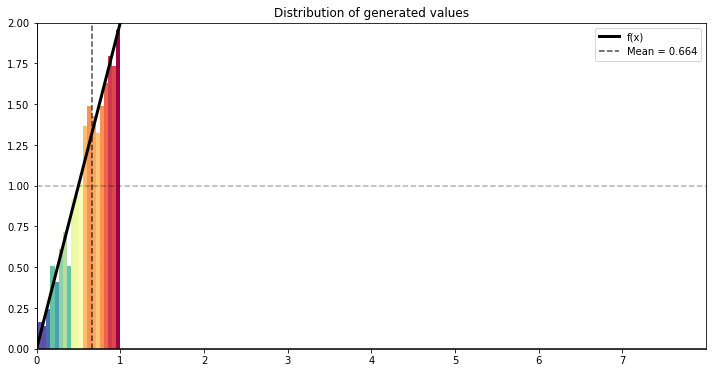

In [79]:
ex6itgen.plot(1000)

### Using previous ex. results
Note that:
$$
x^{n} = \prod_{i=0}^{n} x
$$
So we could generate x^n as the maximum of random variables evenly distributed in the interval $(0,1)$

In [41]:
def ex6gen():
    return max([random() for i in range(n)])
minGen = Generator(pdf=pdf,conds=conds,generator=ex6gen,y_lim=(0,2))

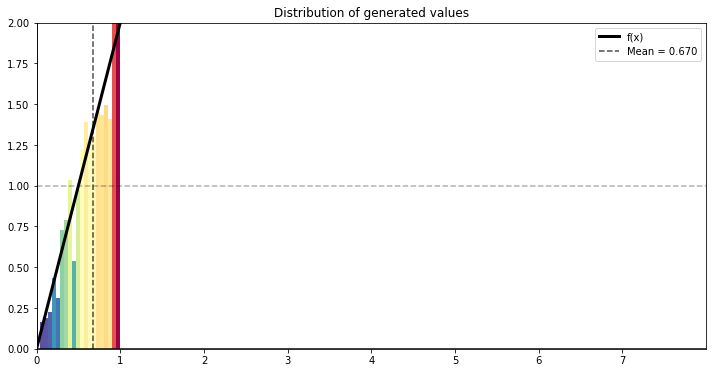

In [42]:
minGen.plot(1000)

### Using rejection method
To use the rejection method we need to define a support variable Y, that we know how to generate,
and a c such that $\cfrac{f(x)}{h(x)} \le c$
  
In this case we will use an even distribution as a support variable:  
$f_{X}(x) = (x^{n})' = nx^{n-1} , f_{Y}(x) = 1, x \in (0,1)$ and $h(x)=\cfrac{f_{X}(x)}{f_{Y}(x)} = f_{X}(x)$
and $c$ is the maximum of $nx^{n-1}, x\in (0,1)$, which is achieved when $x = 1,f_{X}(1)= 2 = c$


In [43]:
pdf_x = [lambda x: n*(x**(n-1))]
pdf_y = (lambda x: 1)
gen_y = random
ex6rejgen = RejectionMethod(pdf_x,pdf_y,gen_y,c=2,piecewise=False,y_lim=(0,2))

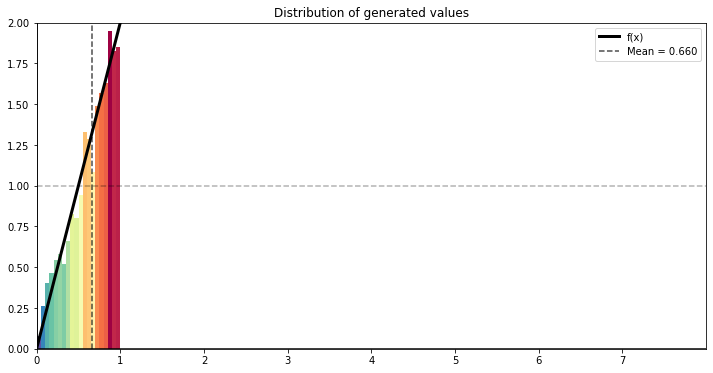

In [44]:
ex6rejgen.plot(1000)

## Ex 7

Develop Inverse Transform method an Rejection method to generate a random variable X with probability distribution:

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{1}{x} & if &  1 <= x <= e \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


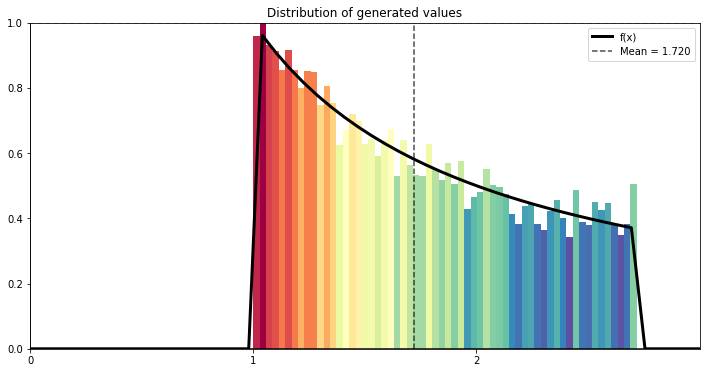

In [54]:
### Inverse transform
pdf = [0,lambda x: 1/x]
cdf = [lambda x: np.log(x)]
inverse_cdf = [lambda x: np.exp(x)]
limits = [math.e]
x = np.linspace(0,3)
conds = [x<1,(x>=1) & (x<=math.e)]
ex7it = InverseTransform(inverse_cdf,limits,pdf=pdf,cdf=cdf,conds=conds,x_lim=(0,3))
ex7it.plot(10000,bins=60)

We will use the rejection method with a random variable $ Y \sim U(1,e) $.  
$f_{Y}(x) = \cfrac{1}{e-1}$  
$h(x)=\cfrac{f_{X}(x)}{f_{Y}(x)}=\cfrac{e-1}{x} \leq c = 1-e, 1 \le x \le e$


<ipython-input-67-e8cd67792334>:2: RuntimeWarning: divide by zero encountered in true_divide
  pdf_x = [lambda x: 1/x]


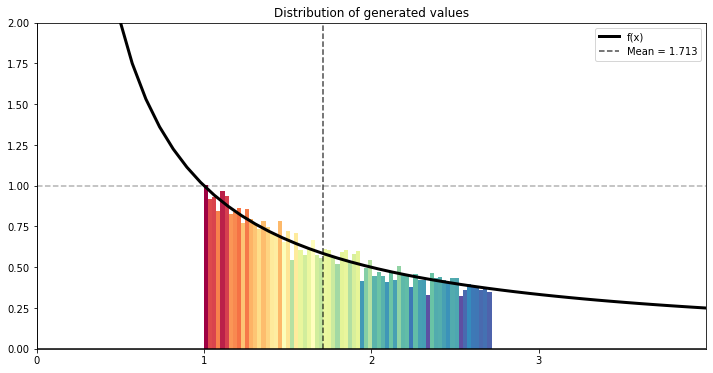

In [67]:
### Rejection method
pdf_x = [lambda x: 1/x]
pdf_y = (lambda x: 1/(math.e-1))
gen_y = lambda: 1 + random()*(math.e-1)
ex7rejgen = RejectionMethod(pdf_x,pdf_y,gen_y,c=(math.e-1),piecewise=False,y_lim=(0,2),x_lim=(0,4))
ex7rejgen.plot(10000,bins=70)

## Ex 8

Let $U,V$ two independent uniformed random variables in $(0,1)$. Proof that $X=U+V$ has a *triangular* density:  


$$
f(x)= \left\{ \begin{array}{ll}
             x & if &  0 \le x < 1 \\
             \\ 2-x & if &  1 \le x < 2 \\
             \\ 0 & otherwise\\ 
             \end{array}
   \right.
$$


$f_{U}(x) = 1 = f_{V}(x)$
$$
f_{U+V}(x) = f_{U} * f_{V} (x) = \int_{0}^x 1 ds = x, 0 \leq x \leq 1 
$$
$$
f_{U+V}(x) = f_{U} * f_{V} (x) = \int_{0}^1 1 ds + \int_{1}^x 1 ds = 1 + 1 - x = 2 - x , 1 \leq x \leq 2 
$$ 

In [86]:
pdf = [lambda x: x,lambda x: 2-x,0]
x = np.linspace(0,2)
conds = [(0 <= x) & (x<1), (x>=1) & (x<=2)]

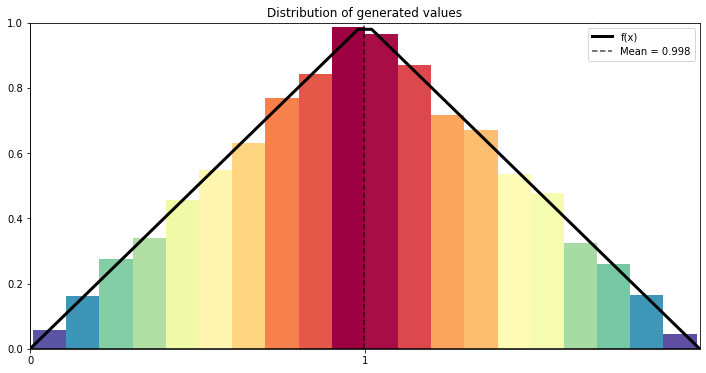

In [87]:
## Using the property that it is the sum of 2 uniforms:
def genUV():
    return random()+random()
ex8rgen = Generator(generator=genUV,pdf=pdf,x_lim=(0,2),conds=conds)
ex8rgen.plot(10000)

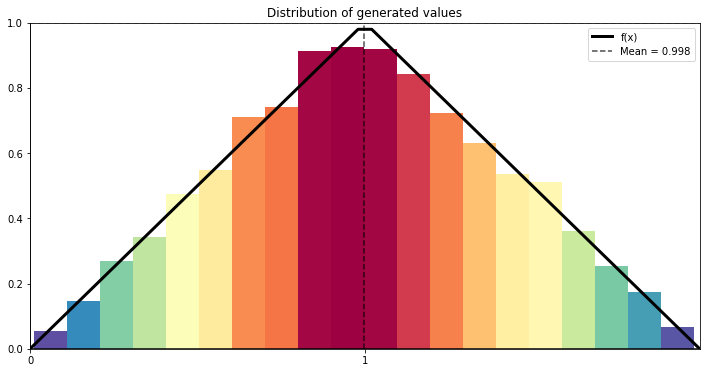

In [100]:
## Inverse transform
cdf = [lambda x: (x**2)/2,lambda x: 1/2 + 1/2*(-x**2+4*x-3)]
cdf_inverse = [lambda x:np.sqrt(2)*np.sqrt(x),lambda x:2-np.sqrt(2)*np.sqrt(1-x)]
limits = [1,2]
ex8itgen = InverseTransform(cdf_inverse,limits,pdf=pdf,cdf=cdf,conds=conds,x_lim=(0,2))
ex8itgen.plot(10000)

## Rejection method
We will use the rejection method with a random variable $ Y \sim U(0,1) $.  
$f_{Y}(x) = 1$  
$h1(x)=\cfrac{f_{X}(x)}{f_{Y}(x)}= x \leq c = 1, 0 \le x \le 1$
$h1(x)=\cfrac{f_{X}(x)}{f_{Y}(x)}= 2-x \leq c = 1, 1 \le x \le 2$


In [ ]:
ex8rgen = RejectionMethod()